In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

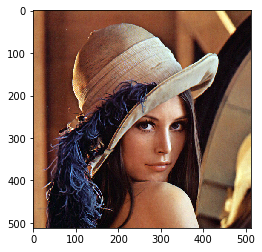

In [2]:
path = 'lena.png'
img = cv2.imread(path)
# comment out the line below to see the colour difference
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

## Scaling

Scaling is just resizing of the image.

In [4]:
height, width = img.shape[:2]

In [6]:
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

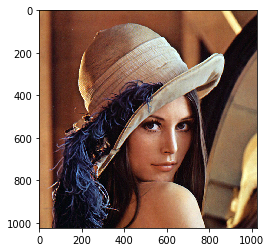

In [7]:
plt.imshow(res)

## Translation

Translation is the shifting of object’s location. If you know the shift in $(x,y)$ direction, let it be $(t_x,t_y)$, you can create the transformation matrix $\textbf{M}$ as follows:
$$\begin{bmatrix} 
1 & 0 & t_x \\
0 & 1 & t_y
\end{bmatrix}$$

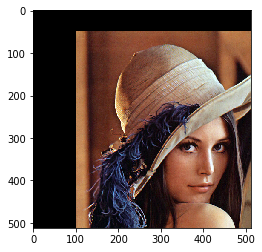

In [10]:
tx,ty = 100,50
M = np.float32([[1,0,tx],[0,1,ty]])
dst = cv2.warpAffine(img,M,(height,width))
plt.imshow(dst)

## Rotation

Rotation of an image for an angle \theta is achieved by the transformation matrix of the form
$$\begin{bmatrix} 
cos\theta & -sin\theta  \\
sin\theta & cos\theta
\end{bmatrix}$$

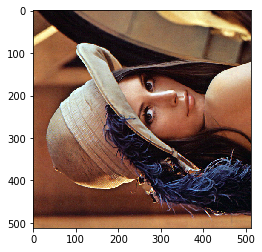

In [14]:
M = cv2.getRotationMatrix2D((height/2,width/2),90,1)
dst = cv2.warpAffine(img,M,(height,width))
plt.imshow(dst)

## Affine Transform

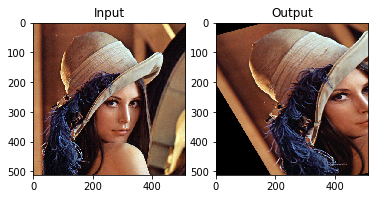

In [17]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(height,width))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## Perspective Transform

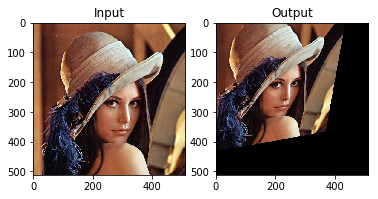

In [25]:
pts1 = np.float32([[50,50],[350,50],[50,350],[400,400]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(height,width))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()